# 使用分箱处理非线性问题

In [2]:
# 构造一个非线性的数据，然后使用线性回归进行拟合
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
rnd = np.random.RandomState(42) #设置随机数种子
x = rnd.uniform(-3,3,size=100) # 从输入的两个数的范围内任意取出100个数字

In [12]:
# 生成y的思路：先使用numpy中的函数生成一个sin函数，然后在增加噪音
y = np.sin(x) + rnd.normal(size=len(x))/3 # r

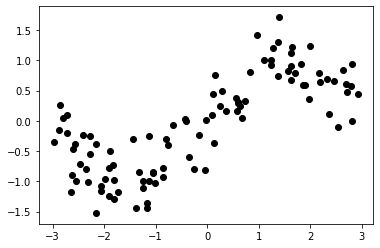

In [13]:
plt.scatter(x,y,c='black')
plt.show()

In [14]:
# 为后续建模做准备，因为现在的x是一维，但是sklearn只接受2维的数据
x.shape

(100,)

In [17]:
x = x.reshape(-1,1)

In [18]:
x.shape

(100, 1)

In [20]:
# 开始对原始数据进行建模和拟合
lr = LinearRegression().fit(x,y)
tree_re = DecisionTreeRegressor(random_state=0).fit(x,y)

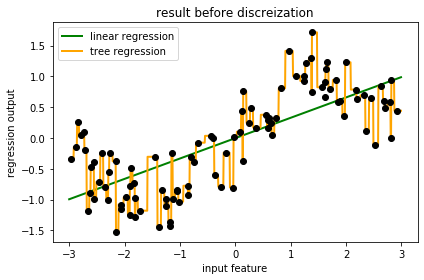

In [25]:
# 放置画布
fig,ax1 = plt.subplots(1)
# 创建测试数据：一系列分布在x轴上的点
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
# 将测试数据代入到模型中，获得拟合结果并绘图
ax1.plot(line,lr.predict(line),linewidth=2,color='green',label='linear regression')
ax1.plot(line,tree_re.predict(line),linewidth=2,color='orange',label='tree regression')
# 将原始数据绘制到
ax1.plot(x[:,0],y,'o',c='k')
# 其他图形选项
ax1.legend(loc='best')
ax1.set_xlabel("input feature")
ax1.set_ylabel("regression output")
ax1.set_title("result before discreization")
plt.tight_layout()
plt.show()

In [26]:
# 决策数过拟合，线性回归只模拟出了一个趋势

# 使用分箱技术(离散化)使线性模型能够分类分线性数据

In [61]:
from sklearn.preprocessing import KBinsDiscretizer
# 将数据分箱
enc = KBinsDiscretizer(n_bins=20 # 分几类？
                      , encode = 'onehot') # ordinal
x_binned = enc.fit_transform(x)

In [62]:
x.shape

(100, 1)

In [63]:
# x_binned是一个稀疏矩阵，可以使用pandas打开
import pandas as pd
pd.DataFrame(x_binned.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# 使用分箱好的模型进行训练
linearR = LinearRegression().fit(x_binned,y)
# linearR.predict(line)

In [65]:
# linearR.predict(line) 和x_binned的数据维度不同一个是10列一个是1列
# 需要使用line转换为10列
line_binned = enc.fit_transform(line)

In [68]:
# linearR.predict(y_binned).shape

分箱后线性回归的分数：0.9302249434982484


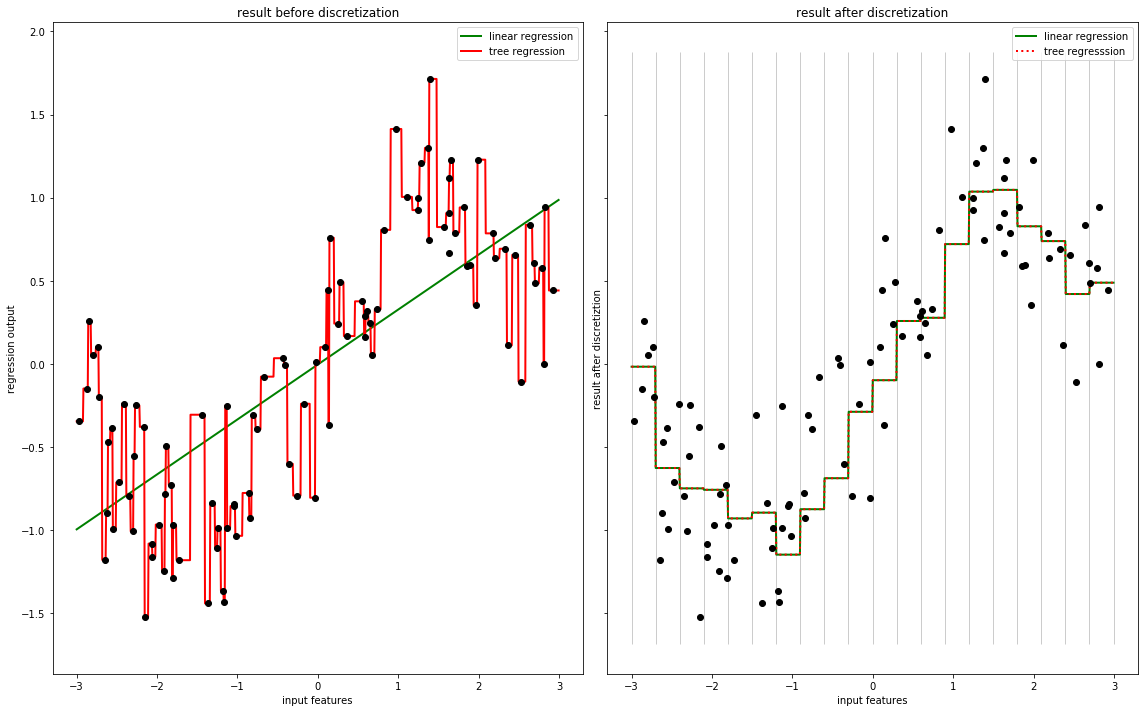

In [69]:
# 将两张图像绘制到一起
fig,(ax1,ax2) = plt.subplots(ncols=2
                            , sharey=True
                            , figsize=(16,10))
# 在子图1中布置在原始数据上建模的结果
ax1.plot(line,lr.predict(line),linewidth=2,c='green',label='linear regression')
ax1.plot(line,tree_re.predict(line),linewidth=2,c='red',label='tree regression')
ax1.plot(x[:,0],y,'o',c='k')
ax1.legend(loc='best')
ax1.set_xlabel('input features')
ax1.set_ylabel('regression output')
ax1.set_title('result before discretization')

# 使用分箱数据进行建模
lr_de = LinearRegression().fit(x_binned,y)
tree_de = DecisionTreeRegressor(random_state=0).fit(x_binned,y)

# 绘制子图2中分箱后数据的建模结果
ax2.plot(line,lr_de.predict(line_binned)
         ,linewidth=2,c='green'
         ,linestyle='-',label='linear regression')

ax2.plot(line,tree_de.predict(line_binned),linewidth=2
        ,c='red',linestyle=':'
        ,label='tree regresssion')
print('分箱后线性回归的分数：{}'.format(lr_de.score(line_binned,np.sin(line))))
# 绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] # 获取分箱中每个箱的sa
          , *plt.gca().get_ylim()
          , linewidth=1
          , alpha=0.2)
# 将原始数据分布放置在图像上
ax2.plot(x[:,0],y,'o',c='k')
# 其他绘图设定
ax2.legend(loc='best')
ax2.set_xlabel('input features')
ax2.set_ylabel('result after discretiztion')
ax2.set_title("result after discretization")
plt.tight_layout()
plt.show()

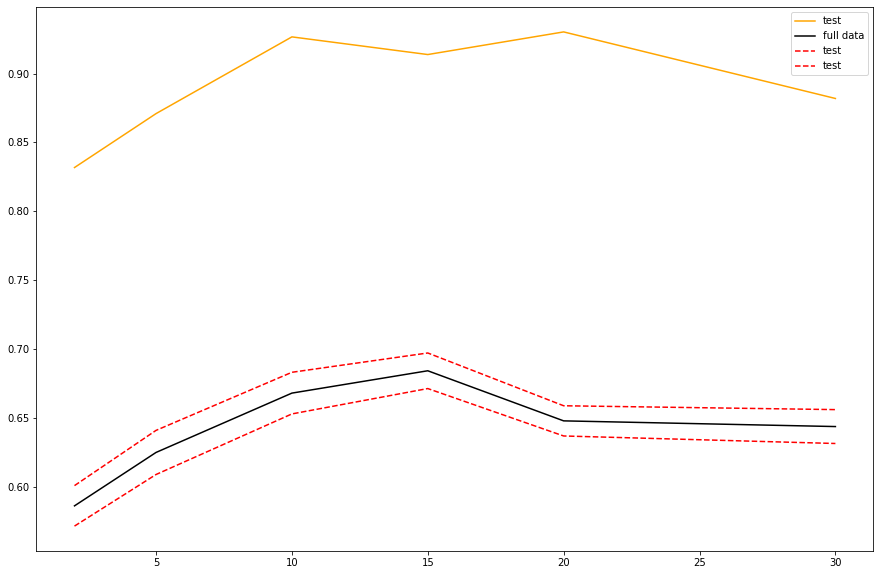

In [59]:
from sklearn.model_selection import cross_val_score as cvs
import numpy as np

pred, score, var = [],[],[]
binsrange = [2,5,10,15,20,30]

for i in binsrange:
    # 实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode='onehot')
    # 转换数据
    x_binned = enc.fit_transform(x)
    line_binned = enc.fit_transform(line)
    # 建立模型
    Linear_R = LinearRegression()
    # 全数据集上的交叉验证
    cv_result = cvs(Linear_R,x_binned,y,cv=5)
    score.append(cv_result.mean())
    var.append(cv_result.var())
    # 测试数据集上的打分结果
    pred.append(Linear_R.fit(x_binned,y).score(line_binned,np.sin(line)))
# 绘制图像
plt.figure(figsize=[15,10])
plt.plot(binsrange,pred,c='orange',label='test')
plt.plot(binsrange,score,c='k',label='full data')
plt.plot(binsrange,score+np.array(var)*0.5,c='red',linestyle='--',label='test')
plt.plot(binsrange,score-np.array(var)*0.5,c='red',linestyle='--',label='test')
plt.legend()
plt.show()